In [2]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_train = pd.read_csv('/Users/idilgun/Downloads/ExpediaTrain.csv',sep=',')

In [3]:
df_test = pd.read_csv('/Users/idilgun/Downloads/ExpediaTest.csv',sep=',')

In [4]:
df_train["date_time"] = pd.to_datetime(df_train["date_time"])
df_train["year"] = df_train["date_time"].dt.year
df_train["month"] = df_train["date_time"].dt.month

Check the number of bookings vs clicks, its around %10

In [5]:
yBooking = np.array(df_train.is_booking[:]).T
from collections import Counter
Counter(yBooking)

Counter({0: 34669600, 1: 3000693})

In [6]:
bookCondition = df_train['is_booking'] == 1
df_booked = df_train[bookCondition]

Select 10000 users at random and only use data associated with them

In [7]:
import random

unique_users = df_train.user_id.unique()

selected_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 10000)) ]
selected_train = df_train[df_train.user_id.isin(selected_user_ids)]

selected_train

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month
1302,2013-02-11 21:30:53,2,3,66,174,41886,890.2953,7209,0,0,...,12837,5,0,1,4,8,118,65,2013,2
1303,2013-02-12 11:34:37,2,3,66,174,41886,890.2953,7209,0,0,...,8824,1,0,1,4,8,118,65,2013,2
1304,2013-02-18 23:03:12,2,3,66,174,41886,890.2953,7209,0,1,...,8824,1,0,1,4,8,118,65,2013,2
1305,2013-02-18 23:26:03,2,3,66,174,41886,890.2953,7209,0,0,...,8824,1,0,1,4,8,118,65,2013,2
1306,2013-02-27 23:05:37,2,3,66,174,41886,890.3341,7209,0,1,...,8824,1,0,1,4,8,118,66,2013,2
1307,2013-02-27 23:22:14,2,3,66,174,41886,890.4977,7209,0,0,...,8824,1,0,1,4,8,118,96,2013,2
1308,2013-04-24 13:56:52,2,3,66,174,41886,193.9520,7209,0,0,...,8250,1,0,1,2,50,628,1,2013,4
1309,2013-04-24 14:00:57,2,3,66,174,41886,193.9520,7209,0,0,...,8250,1,0,2,2,50,628,1,2013,4
1310,2013-04-24 14:24:50,2,3,66,174,41886,192.6034,7209,0,0,...,8250,1,0,2,2,50,628,1,2013,4
1311,2013-04-24 14:26:29,2,3,66,174,41886,192.9435,7209,0,0,...,8250,1,0,3,2,50,628,88,2013,4


Check again the number of bookings vs clicks, its still around %10

In [8]:
ySelectedBooking = np.array(selected_train.is_booking[:]).T
Counter(ySelectedBooking)

Counter({0: 294909, 1: 25515})

In [9]:
list(selected_train)

['date_time',
 'site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'orig_destination_distance',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_ci',
 'srch_co',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster',
 'year',
 'month']

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


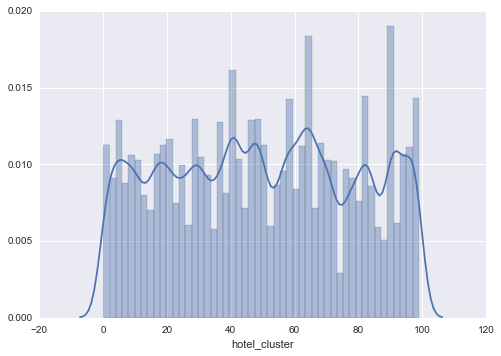

In [10]:
import seaborn as sns
sns.distplot(selected_train["hotel_cluster"])
plt.show()

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


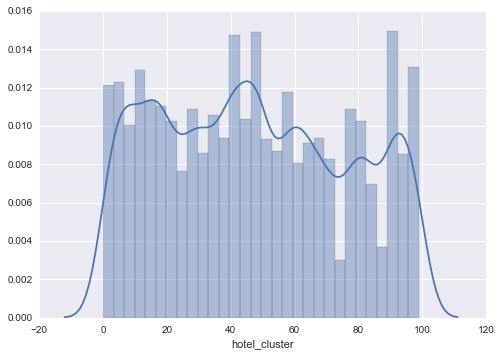

In [11]:
df_SelectedBooked = selected_train[bookCondition]
sns.distplot(df_SelectedBooked["hotel_cluster"])
plt.show()

In [12]:
srch_ci_utime = pd.DatetimeIndex(selected_train['srch_ci']).astype(np.int64) // 10**9 
srch_co_utime = pd.DatetimeIndex(selected_train['srch_co']).astype(np.int64) // 10**9 
    
selected_train["duration"] = (srch_co_utime - srch_ci_utime) / (3600 * 24)

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


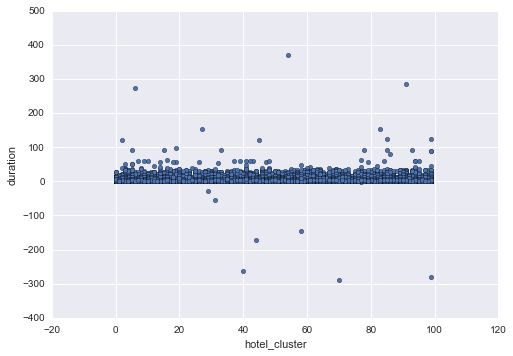

In [13]:
selected_train.plot.scatter(x='hotel_cluster', y='duration', style='o')

/Users/idilgun/Desktop/DATA_MINING/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


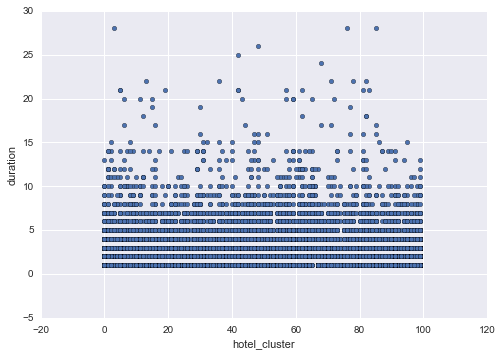

In [14]:
df_SelectedBooked = selected_train[bookCondition]
df_SelectedBooked.plot.scatter(x='hotel_cluster', y='duration', style='o')